In [8]:
import numpy as np
import networkx as nx
from scipy.sparse.linalg import eigsh
from scipy.sparse import csr_matrix
import matplotlib.pyplot as plt

In [4]:
def load_edge_list(file_path):
    edges = []
    with open(file_path, 'r') as f:
        for line in f:
            parts = line.strip().split(',')
            if len(parts) >= 2:
                u, v = int(parts[0]), int(parts[1])
                edges.append((u, v))
    return edges

In [ ]:

def spectral_modularity_clustering(edges):
    G = nx.Graph()
    G.add_edges_from(edges)

    G = nx.convert_node_labels_to_integers(G, label_attribute="orig_label")
    label_map = nx.get_node_attributes(G, "orig_label")

    A = nx.adjacency_matrix(G)
    degrees = np.array([deg for _, deg in G.degree()])
    m = A.sum() / 2

    K = degrees
    K_outer = np.outer(K, K) / (2 * m)
    B = A.toarray() - K_outer

    vals, vecs = eigsh(B, k=1, which='LA')
    v1 = vecs[:, 0]

    S = np.where(v1 >= 0, 1, -1)

    print("Community Assignments:")
    for idx, s in enumerate(S):
        print(f"Node {label_map[idx]} -> Community {'A' if s == 1 else 'B'}")

    return {label_map[i]: ('A' if S[i] == 1 else 'B') for i in range(len(S))}

file_path = 'adj.txt'
edges = load_edge_list(file_path)
communities = spectral_modularity_clustering(edges)

Community Assignments:
Node 2 -> Community A
Node 1 -> Community A
Node 7 -> Community A
Node 8 -> Community A
Node 13 -> Community A
Node 14 -> Community A
Node 16 -> Community A
Node 17 -> Community A
Node 19 -> Community A
Node 20 -> Community A
Node 23 -> Community A
Node 24 -> Community A
Node 25 -> Community A
Node 26 -> Community A
Node 29 -> Community A
Node 30 -> Community A
Node 31 -> Community A
Node 34 -> Community A
Node 35 -> Community A
Node 39 -> Community A
Node 41 -> Community A
Node 42 -> Community A
Node 43 -> Community A
Node 46 -> Community A
Node 47 -> Community A
Node 48 -> Community A
Node 49 -> Community A
Node 50 -> Community A
Node 51 -> Community A
Node 52 -> Community A
Node 53 -> Community A
Node 54 -> Community A
Node 56 -> Community A
Node 57 -> Community A
Node 58 -> Community A
Node 59 -> Community A
Node 61 -> Community A
Node 62 -> Community A
Node 63 -> Community A
Node 65 -> Community A
Node 67 -> Community A
Node 68 -> Community A
Node 69 -> Comm

In [6]:
def visualize_graph(G, communities, label_map):
    color_map = []
    for node in G.nodes():
        original_node = label_map[node]
        color_map.append('skyblue' if communities[original_node] == 'A' else 'salmon')

    pos = nx.spring_layout(G, seed=42)
    plt.figure(figsize=(8, 6))
    nx.draw(G, pos, node_color=color_map, with_labels=True,
            labels={i: label_map[i] for i in G.nodes()},
            node_size=500, font_size=10, edge_color='gray')
    plt.title("Community Detection (Modularity Maximization)")
    plt.tight_layout()
    plt.show()

/var/folders/mg/w4cw2nc563q822jj2x4x_qqh0000gn/T/ipykernel_3508/2523936058.py:13: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


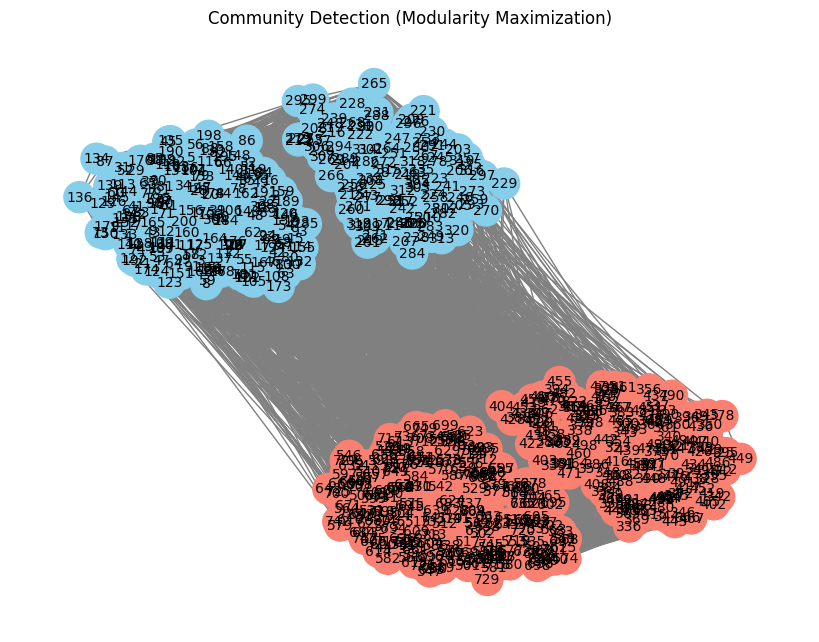

In [9]:
G = nx.Graph()
G.add_edges_from(edges)
G = nx.convert_node_labels_to_integers(G, label_attribute="orig_label")
label_map = nx.get_node_attributes(G, "orig_label")

visualize_graph(G, communities, label_map)


In [ ]:
def visualize_initial_graph(edges):
    G_init = nx.Graph()
    G_init.add_edges_from(edges)

    pos = nx.spring_layout(G_init, seed=42)
    plt.figure(figsize=(8, 6))
    nx.draw(G_init, pos, with_labels=True, node_color='lightgray',
            edge_color='gray', node_size=500, font_size=10)
    plt.title("Initial Graph (Before Community Detection)")
    plt.tight_layout()
    plt.show()


/var/folders/mg/w4cw2nc563q822jj2x4x_qqh0000gn/T/ipykernel_3508/1842081258.py:10: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


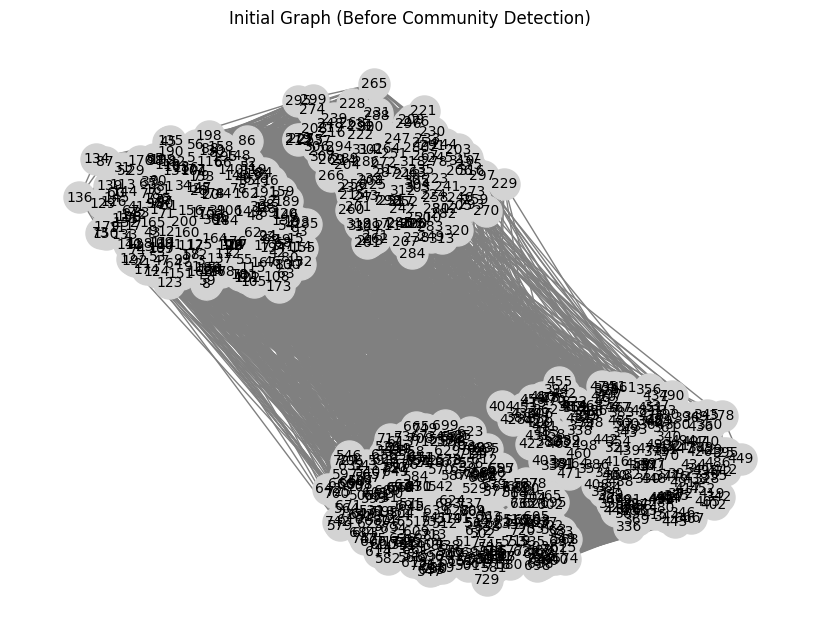

In [11]:
edges = load_edge_list(file_path)
visualize_initial_graph(edges)
